In [1]:
from src.saving_plan import SavingPlan, get_saving_plans, get_time_periods, simulate, write_simulation_result
from src.visualize import plot_total_worth
import datetime
import numpy as np
import polars as pl
import plotly.express as px
from collections import namedtuple
import plotly.graph_objects as go
from datetime import date

import plotly.io as pio 
template = "plotly_dark"

pio.templates.default = template

custom_template = {
    # "layout": {"colorway": colors},
    "layout": {"bargap": 0},
    "data": {
        "histogram": [{"marker": {"line": {"color": "#252525", "width": 1}}}],
        "bar": [{"marker": {"line": {"color": "#252525", "width": 1}}}],
    },
}

pio.templates[template].update(custom_template);

In [2]:
# Read the MSCI World historical data
df = pl.read_parquet("data/msci_world_index.parquet").lazy()

Let`s check the full available time range. We can se what would had happened if we had started the saving plan back to 1972, wiht 10$ per month.

In [3]:
fig = plot_total_worth(
    df=df,
    invest_amount=10,
    period=(date(1972,1,1), date(2024,8,31)),
    title="Saving plan with 10$"
)
fig.show()

In [4]:
period1 = (date(1972,1,1), date(2024,8,31))
period2 = (date(1980,5,1), date(1985,5,31))
period3 = (date(1990,3,1), date(2005,3,31))
period4 = (date(2000,10,1), date(2015,10,30))
period5 = (date(2010,1,1), date(2024,8,31))

## Period 1

In [5]:
fig = plot_total_worth(
    df=df,
    invest_amount=10,
    period=(date(1972,1,1), date(2024,8,31)),
    title="Saving plan with 10$"
)
fig.show()

In [6]:
fig.write_image("assets/saving_plan_period_1.png")

## Period 2 

In [7]:
fig = plot_total_worth(
    df=df,
    invest_amount=10,
    period=period2,
    title="Saving plan with 10$"
)
fig.show()

In [8]:
fig.write_image("assets/saving_plan_period_2.png")

# Period 3

In [9]:
fig = plot_total_worth(
    df=df,
    invest_amount=10,
    period=period3,
    title="Saving plan with 10$"
)
fig.show()

In [10]:
fig.write_image("assets/saving_plan_period_3.png")

## Period 4

In [11]:
fig = plot_total_worth(
    df=df,
    invest_amount=10,
    period=period4,
    title="Saving plan with 10$"
)
fig.show()

In [12]:
fig.write_image("assets/saving_plan_period_4.png")

## Period 5

In [13]:
fig = plot_total_worth(
    df=df,
    invest_amount=10,
    period=period5,
    title="Saving plan with 10$"
)
fig.show()

In [27]:
fig.write_image("assets/saving_plan_period_5.png")

# Check multiple results with the same end date

Check whether day are the same for different periods.

In [15]:
starts = [date(1983,8,1), date(1989,5,1), date(1991,3,1), date(2003,10,1), date(2008,1,1), date(2020,11,1)]
end = (date(2024,8,31))


for start in starts:
    fig = plot_total_worth(
        df=df,
        invest_amount=10,
        period=(start, end),
        title="Saving plan with 10$"
    )
    fig.show()
    fig.write_image(f"assets/same_end_with_{start}.png")


# Evaluating all possible scenarios with one fix end date

In [18]:
results_df = pl.read_parquet("data/results").lazy()

In [70]:
from tqdm import tqdm

end = date(2024, 8, 31)

starts = []

for y in range(1972, 2024):
    for m in range(1, 13):
        starts.append(date(y, m, 1))


def plot_all_with_same_end(starts):


    fig = go.Figure()

    for start in tqdm(starts):
        data = []
        for day in range(1, 32):

            saving_plan = SavingPlan(
                df=df, invest_amount=10, day_to_invest=day, period=(start, end)
            )
            data.append(saving_plan.total_worth)

        data = np.array(data)
        data = data / np.max(data)


        fig.add_trace(
            go.Scatter(
                x=list(range(1, 32)),
                y=data,
                mode="lines",
                name="Mean",
                line_color="gray",
                opacity=0.3,
            )
        )

        fig.update_xaxes(tickvals=list(range(1, 32)), title="Day of the month")
        fig.update_yaxes(title="Normalized total worth")
        fig.update_layout(title=f"Saving plan starting on {start}", height=1000, width=500, showlegend=False)

        data = []


    return fig

In [71]:
fig = plot_all_with_same_end(starts)

100%|██████████| 624/624 [00:34<00:00, 18.14it/s]


In [76]:
# fig.update_layout(width=1000, height=500).show(renderer="svg")

In [77]:
fig.write_image("assets/saving_plan_same_end_all.png")

# Compare two different saving plans with the same time period


Using the best day and the worst day

In [78]:
saving_plan_a = SavingPlan(
    df=df, invest_amount=10, day_to_invest=5, period=(date(1972,1,1), date(2024,8,31)
    )
)

saving_plan_b = SavingPlan(
    df=df, invest_amount=10, day_to_invest=30, period=(date(1972,1,1), date(2024,8,31)
    )
)

In [96]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=saving_plan_a.result_df.collect()["Date"].dt.date(),
        y=saving_plan_a.result_df.collect()["total_worth"],
        mode="lines+markers",
        name="Day 5",
    )
)

fig.add_trace(
    go.Scatter(
        x=saving_plan_b.result_df.collect()["Date"].dt.date(),
        y=saving_plan_b.result_df.collect()["total_worth"],
        mode="lines+markers",
        name="Day 30",
    )
)

fig.update_layout(
    title="Saving plan with 10💵<br>Day 5 vs Day 30", 
    height=500,
    width=1000,
    xaxis_title="Date", 
    yaxis_title="Total worth")

# set the x and y range
fig


fig.write_image("assets/saving_plan_day_5_vs_30.png")
(fig
 .update_xaxes(range=["2019-05-01", "2023-05-01"])
 .update_yaxes(range=[30000, 60000])
 .write_image("assets/saving_plan_day_5_vs_30_zoomed.png"))

In [97]:
fig

In [113]:
diff = saving_plan_a.result_df.collect()["total_worth"] - saving_plan_b.result_df.collect()["total_worth"]

diff_pct = diff / saving_plan_b.result_df.collect()["total_worth"] * 100

PLotting the distribution of the differences between day 5 and day 30

In [122]:
fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=diff_pct,
        histnorm="percent",
        nbinsx=50,
    ))

fig.update_layout(
    title="Difference between day 5 and day 30",
    xaxis_title="Difference",
    yaxis_title="percent",
    height=500,
    width=1000
)

# median = np.median(diff_pct)
# fig.add_vline(x=median, line_dash="dash", line_color="red", annotation_text=f"Median: {median:.2f}%")

mean = np.mean(diff_pct.to_numpy())
fig.add_vline(x=mean, line_dash="dash", line_color="yellow", annotation_text=f"Mean: {mean:.2f}%")

fig.write_image("assets/saving_plan_day_5_vs_30_diff_dist.png")

# Differences between cheapes and most expensive day to invest

In [128]:
agg_df = (
    df
    .group_by(
        pl.col("Date").dt.year().alias("year"),
        pl.col("Date").dt.month().alias("month")
    ).agg(
        pl.min("Close").alias("min_close"),
        pl.max("Close").alias("max_close"),
    ).with_columns(
        ((pl.col("max_close") - pl.col("min_close")) / pl.col("min_close") * 100).alias("diff_pct")
    )
)

In [130]:
diff_pct = agg_df.collect()["diff_pct"]

In [143]:
fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=diff_pct,
        histnorm="percent",
        nbinsx=50,
    )
)

fig.update_layout(
    title="Monthly differences",
    xaxis_title="Difference %",
    yaxis_title="percent",
    height=500,
    width=1000,
)

# add median
median = np.median(diff_pct)

fig.add_vline(
    x=median,
    line_dash="dash",
    line_color="red",
    annotation_text=f"Median: {median:.2f}%",
    annotation_position="right",
)

# q1
q1 = np.percentile(diff_pct, 25)
fig.add_vline(
    x=q1, line_dash="dash", line_color="yellow", annotation_text=f"Q1: {q1:.2f}%", annotation_position="top left"
)

# q3
q3 = np.percentile(diff_pct, 75)
fig.add_vline(
    x=q3,
    line_dash="dash",
    line_color="yellow",
    annotation_text=f"Q3: {q3:.2f}%",
    annotation_position="top right",
)

fig.write_image("assets/monthly_diff_dist.png")

In [144]:
fig.show()

# Day rankings

Create dataframe with all possible starting dates

In [183]:
result_dataframes = []

for i in range(1, 32):
    saving_plan = SavingPlan(df, 10, i, (datetime.date(1971, 12, 31), datetime.date(2020, 3, 31)))
    result_dataframes.append(saving_plan.result_df)

result_df = pl.concat(result_dataframes).sort("Date", "day_to_invest")

In [184]:
result_df.head().collect(
)

Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,bought_stocks,all_stocks,total_worth,day_to_invest,pct_chg,abs_pct_chg
f64,f64,f64,f64,i64,f64,f64,datetime[ns],f64,f64,f64,i32,f64,f64
104.300003,104.300003,104.300003,104.300003,0,0.0,0.0,1972-01-03 00:00:00,0.095877,0.095877,10.0,1,null,null
104.300003,104.300003,104.300003,104.300003,0,0.0,0.0,1972-01-03 00:00:00,0.095877,0.095877,10.0,2,null,null
104.300003,104.300003,104.300003,104.300003,0,0.0,0.0,1972-01-03 00:00:00,0.095877,0.095877,10.0,3,null,null
104.599998,104.599998,104.599998,104.599998,0,0.0,0.0,1972-01-04 00:00:00,0.095602,0.095602,10.0,4,null,null
105.599998,105.599998,105.599998,105.599998,0,0.0,0.0,1972-01-05 00:00:00,0.094697,0.094697,10.0,5,null,null


## Creagin rank dataframe

In [186]:
pl.Config.set_tbl_rows(60)

w = (pl.col("Date").dt.year().alias("year"), pl.col("Date").dt.month().alias("month"))

rank_df = result_df.with_columns(rank=pl.col("Close").rank(method="dense").over(w)).sort(["Date", "day_to_invest"]) #  .collect()

In [187]:
rank_df.head().collect()

Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,bought_stocks,all_stocks,total_worth,day_to_invest,pct_chg,abs_pct_chg,rank
f64,f64,f64,f64,i64,f64,f64,datetime[ns],f64,f64,f64,i32,f64,f64,u32
104.300003,104.300003,104.300003,104.300003,0,0.0,0.0,1972-01-03 00:00:00,0.095877,0.095877,10.0,1,null,null,1
104.300003,104.300003,104.300003,104.300003,0,0.0,0.0,1972-01-03 00:00:00,0.095877,0.095877,10.0,2,null,null,1
104.300003,104.300003,104.300003,104.300003,0,0.0,0.0,1972-01-03 00:00:00,0.095877,0.095877,10.0,3,null,null,1
104.599998,104.599998,104.599998,104.599998,0,0.0,0.0,1972-01-04 00:00:00,0.095602,0.095602,10.0,4,null,null,2
105.599998,105.599998,105.599998,105.599998,0,0.0,0.0,1972-01-05 00:00:00,0.094697,0.094697,10.0,5,null,null,3


I go with the dense ranking method, which assigns the same rank to the same values, but the next value will have a rank that is the next number after the previous rank. 

In [165]:


agg_df = rank_df.group_by(pl.col("day_to_invest")).agg(
    # pl.quantile("rank", 0.5).alias("total_rank"),
    pl.mean("rank").alias("total_rank"), 
).sort("day_to_invest").collect()

fig = px.line(agg_df, x="day_to_invest", y="total_rank", markers=True)

# tickvals for all days
fig.update_xaxes(tickvals=list(range(1, 32)))

In [164]:
rank_df.filter(~pl.col("Date").dt.year().eq(1972).and_(pl.col("Date").dt.month().eq(1))).collect().head(28)

Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,bought_stocks,all_stocks,total_worth,day_to_invest,pct_chg,abs_pct_chg,rank
f64,f64,f64,f64,i64,f64,f64,datetime[ns],f64,f64,f64,i32,f64,f64,u32
112.800003,112.800003,112.800003,112.800003,0,0.0,0.0,1972-02-01 00:00:00,0.088652,0.18453,20.814957,1,8.149568,8.149568,1
113.400002,113.400002,113.400002,113.400002,0,0.0,0.0,1972-02-02 00:00:00,0.088183,0.184061,20.872483,2,8.72483,8.72483,3
113.400002,113.400002,113.400002,113.400002,0,0.0,0.0,1972-02-03 00:00:00,0.088183,0.184061,20.872483,3,8.72483,8.72483,3
113.400002,113.400002,113.400002,113.400002,0,0.0,0.0,1972-02-04 00:00:00,0.088183,0.183786,20.8413,4,8.413005,8.413005,3
113.199997,113.199997,113.199997,113.199997,0,0.0,0.0,1972-02-07 00:00:00,0.088339,0.183036,20.719697,5,7.196968,7.196968,2
113.199997,113.199997,113.199997,113.199997,0,0.0,0.0,1972-02-07 00:00:00,0.088339,0.178592,20.216606,6,2.166059,2.166059,2
113.199997,113.199997,113.199997,113.199997,0,0.0,0.0,1972-02-07 00:00:00,0.088339,0.178511,20.207394,7,2.073936,2.073936,2
113.400002,113.400002,113.400002,113.400002,0,0.0,0.0,1972-02-08 00:00:00,0.088183,0.178681,20.262444,8,2.624436,2.624436,3
114.0,114.0,114.0,114.0,0,0.0,0.0,1972-02-09 00:00:00,0.087719,0.178217,20.316742,9,3.167421,3.167421,5


## get distribution of the first day

using the sum of the ranks, the best day was the first day. To get better insight, we can get the distribution of the first day.


In [177]:
day_1_rank_dist = (
    rank_df
    .filter(pl.col("day_to_invest") == 1)
    .group_by(pl.col("rank"))
    .len()
    ).collect()


# day_1_rank_dist
x, y = day_1_rank_dist["rank"].to_list(), day_1_rank_dist["len"].to_list()
px.bar(x=x, y=y)

In [168]:
day_2_rank_dist = (
    rank_df
    .filter(pl.col("day_to_invest") == 2)
    .group_by(pl.col("rank"))
    .len()#
    ).collect()


# day_2_rank_dist
x, y = day_2_rank_dist["rank"].to_list(), day_2_rank_dist["len"].to_list()
px.bar(x=x, y=y)

In [169]:
day_31_rank_dist = (
    rank_df
    .filter(pl.col("day_to_invest") == 31)
    .group_by(pl.col("rank"))
    .agg(
        pl.len().alias("len"),
    ).with_columns(pct=pl.col("len") / pl.sum("len")
    ).collect())#

# day_31_rank_dist
px.bar(day_31_rank_dist, x="rank", y="pct",)

In [170]:
day_15_rank_dist = (
    rank_df
    .filter(pl.col("day_to_invest") == 15)
    .group_by(pl.col("rank"))
    .agg(
        pl.len().alias("len"),
    ).with_columns(pct=pl.col("len") / pl.sum("len")
    ).collect())


# day_15_rank_dist
px.bar(day_15_rank_dist, x="rank", y="pct",)

In [280]:
rank_df.collect().to_pandas().groupby("day_to_invest")["rank"].agg(pd.Series.mode)

day_to_invest
1           1
2           2
3           2
4           4
5           3
6           4
7           5
8           6
9           6
10          7
11          7
12          9
13          9
14         11
15         10
16         10
17         10
18         11
19    [8, 12]
20          9
21         16
22         16
23         16
24         15
25         18
26          3
27         19
28         19
29         20
30         19
31          1
Name: rank, dtype: object

In [498]:
sns.cubehelix_palette(start=2, rot=-320)

[[0.9276888603847685, 0.8232204383433398, 0.7906701700395558],
 [0.694849317529087, 0.7471988282824241, 0.5500154524443984],
 [0.40437668418885286, 0.6620211150157017, 0.5156525365866271],
 [0.31594685733006167, 0.5151871606799069, 0.29661689139743475],
 [0.14758886353434134, 0.3526353100674887, 0.34422244459748363],
 [0.1304255508440204, 0.1399571753076304, 0.2483386608130643]]

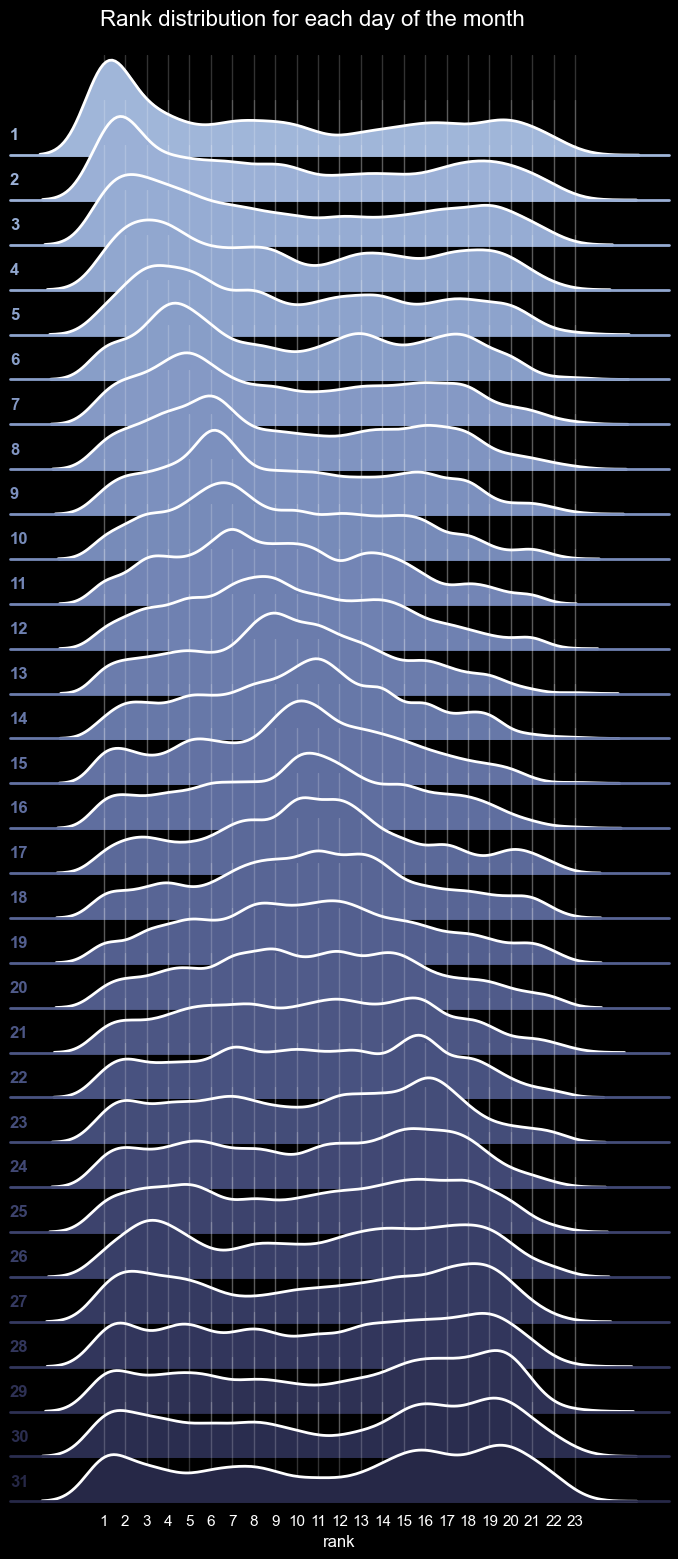

In [500]:
# creating Overlapping densities (‘ridge plot’) from day 1 to day 31 with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("dark_background")
# sns.set_theme(style="dark", rc={"axes.facecolor": (0, 0, 0, 0)})
# Set the theme with a dark background
sns.set_theme(style="dark", rc={
    "axes.facecolor": (0, 0, 0, 0),  # Black background for axes
    "figure.facecolor": (0, 0, 0, 1),  # Black background for figure
    "axes.labelcolor": "white",  # White labels
    "xtick.color": "white",  # White x-tick labels
    "ytick.color": "white",  # White y-tick labels
    "text.color": "white",  # White text
    "grid.color": "white",  # White grid
    "axes.grid": True,
    "grid.alpha": 0.2,
})


# Initialize the FacetGrid object
pal = sns.cubehelix_palette(31, rot=-.1, light=.7, dark=.17)
# pal = sns.color_palette("cividis", 10)
g = sns.FacetGrid(rank_df.collect().to_pandas(), row="day_to_invest", hue="day_to_invest", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "rank",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

g.map(sns.kdeplot, "rank", clip_on=False, color="w", lw=2, bw_adjust=.5)

# # adding vline for the median to all rows
# modes = rank_df.collect().to_pandas().groupby("day_to_invest")["rank"].agg(pd.Series.mode)
# for ax, m in zip(g.axes.flat, modes):
#     if isinstance(m, np.ndarray):
#         m = m[0]
#     ax.axvline(m, color="red", linestyle="--", linewidth=1)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "rank")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.55)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# set title for the figure
g.figure.suptitle("Rank distribution for each day of the month", fontsize=16, position=(0.5, 1.005))

# add x ticks for all ranks
g.set(xticks=list(range(1, rank_df.collect().to_pandas()["rank"].max() + 1)))


In [ ]:
fig.show()

In [122]:
plot_total_worth(
    df, 
    period=(datetime.date(1987, 1, 1), datetime.date(2024, 9, 1)), 
    title="Total worth of different saving plans")

In [127]:
plot_total_worth(
    df, 
    period=(datetime.date(2024, 5, 1), datetime.date(2024, 9, 1)), 
    title="Total worth of different saving plans")

In [4]:
plot_total_worth(
    df, 
    period=(datetime.date(1972, 2, 1), datetime.date(2024, 8, 1)), 
    title="Total worth of different saving plans")

In [15]:
plot_total_worth(
    df, 
    period=(datetime.date(1978, 8, 1), datetime.date(2024, 9, 1)), 
    title="Total worth of different saving plans")

In [30]:
w = pl.col("Date").dt.year().alias("year"), pl.col("Date").dt.month().alias("month")
pct_chg = df.group_by(w).agg((pl.col("Close").max() - pl.col("Close").min()) / pl.col("Close").min() * 100).collect()

In [42]:
values = pct_chg["Close"]

In [43]:
fig = px.histogram(pct_chg["Close"].to_list(), title="Histogram of monthly returns", labels={"x": "Monthly return [%]"}, nbins=200)

tickvals = list(range(int(pct_chg["Close"].min()), int(pct_chg["Close"].max()), 1))
fig.update_xaxes(tickmode="array", tickvals=tickvals, showgrid=False)
fig.update_yaxes(showgrid=False)


q1 = values.quantile(0.25)
q3 = values.quantile(0.75)
plus_2_std = values.mean() + 2 * values.std()
minus_2_std = values.mean() - 2 * values.std()
median = values.median()
mean = values.mean()

fig.add_vline(x=q1, line_dash="dash", line_color="yellow", annotation_text=f"Q1: {q1:.2f}%", annotation_position="top left")
fig.add_vline(x=median, line_dash="dash", line_color="red", annotation_text=f"Median: {median:.2f}%", annotation_position="right")
fig.add_vline(x=q3, line_dash="dash", line_color="yellow", annotation_text=f"Q3: {q3:.2f}%", annotation_position="top right")

In [ ]:
values = 100 - min_worth / max_worth * 100

fig = px.histogram(values)

# change ticks to every second
tickvals = list(range(int(values.min()), int(values.max()), 1))
fig.update_xaxes(tickmode="array", tickvals=tickvals, showgrid=False)
fig.update_yaxes(showgrid=False)

# add vertical gridlines

# add q1 median and q3

# q1
q1 = values.quantile(0.25)
q3 = values.quantile(0.75)
plus_2_std = values.mean() + 2 * values.std()
minus_2_std = values.mean() - 2 * values.std()
median = values.median()
mean = values.mean()

fig.add_vline(x=q1, line_dash="dash", line_color="yellow", annotation_text=f"Q1: {q1:.2f}%", annotation_position="top left")
fig.add_vline(x=median, line_dash="dash", line_color="red", annotation_text=f"Median: {median:.2f}%", annotation_position="right")
fig.add_vline(x=q3, line_dash="dash", line_color="yellow", annotation_text=f"Q3: {q3:.2f}%", annotation_position="top right")
# fig.add_vline(x=mean, line_dash="dash", line_color="green", annotation_text=f"Mean: {mean:.2f}%", annotation_position="bottom right")
# fig.add_vline(x=plus_2_std, line_dash="dash", line_color="red", annotation_text=f"Mean + 2 Std: {plus_2_std:.2f}%", annotation_position="bottom left")
# fig.add_vline(x=minus_2_std, line_dash="dash", line_color="red", annotation_text=f"Mean - 2 Std: {minus_2_std:.2f}%", annotation_position="bottom left")

fig.update_traces(marker_line_width=1,marker_line_color="#252525")

fig.update_layout(
    width=1000,
    height=500,
    title="Distribution of max total worth difference in % for every possible 15 year period",
    xaxis_title="Total Worth Difference in %",
    yaxis_title="Frequency",
    template="plotly_dark",
    showlegend=False
)

In [32]:
import plotly.express as px

In [79]:
saving_plan = SavingPlan(df=df, invest_amount=10, day_to_invest=2, period=(datetime.date(1972, 2, 1), datetime.date(2024, 9, 1)))
y1 = saving_plan.result_df.select(pl.col("Close")).collect()["Close"].to_list()

saving_plan = SavingPlan(df=df, invest_amount=10, day_to_invest=30, period=(datetime.date(1972, 2, 1), datetime.date(2024, 9, 1)))
y2 = saving_plan.result_df.select(pl.col("Close")).collect()["Close"].to_list()

fig = px.line(y=[y1, y2], title="Total worth of different saving plans", labels={"y": "Total worth", "x": "Time"})
fig


In [78]:
print(len(y1))

631


In [62]:
y2

[112.80000305175781,
 117.4000015258789,
 118.69999694824219,
 119.69999694824219,
 121.9000015258789,
 119.30000305175781,
 121.4000015258789,
 124.0,
 121.5,
 123.30000305175781,
 129.0,
 133.0,
 129.60000610351562,
 131.5,
 130.39999389648438,
 124.80000305175781,
 123.9000015258789,
 123.80000305175781,
 126.30000305175781,
 121.69999694824219,
 124.69999694824219,
 125.5,
 107.30000305175781,
 108.9000015258789,
 108.5,
 109.5,
 106.5,
 106.5999984741211,
 101.69999694824219,
 97.30000305175781,
 90.69999694824219,
 82.69999694824219,
 74.30000305175781,
 81.0999984741211,
 78.69999694824219,
 79.0999984741211,
 90.0999984741211,
 98.0,
 96.9000015258789,
 102.0999984741211,
 104.69999694824219,
 104.69999694824219,
 97.80000305175781,
 96.5,
 91.80000305175781,
 97.9000015258789,
 100.5,
 101.5999984741211,
 109.69999694824219,
 108.69999694824219,
 109.0,
 108.0999984741211,
 106.4000015258789,
 109.0999984741211,
 108.0999984741211,
 108.5999984741211,
 107.69999694824219,
 104

In [52]:
saving_plan.result_df.collect().tail(2)

Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,bought_stocks,all_stocks,total_worth,day_to_invest,pct_chg,abs_pct_chg
f64,f64,f64,f64,i64,f64,f64,datetime[ns],f64,f64,f64,i32,f64,f64
3513.699951,3526.699951,3507.0,3520.0,0,0.0,0.0,2024-07-01 00:00:00,0.002841,18.098313,63706.060659,1,1.928537,1.928537
3571.800049,3582.899902,3499.5,3518.0,0,0.0,0.0,2024-08-01 00:00:00,0.002843,18.101155,63679.864034,1,-0.056818,0.056818


In [49]:
y2[-1]

3520.0

In [5]:
start = datetime.datetime(2022, 2, 15) 
end = datetime.datetime(2024, 3, 15)
period = (start, end)

In [5]:
saving_plans_a = get_saving_plans(df, 10, (datetime.date(2022, 2, 15), datetime.date(2024, 3, 15)))
saving_plans_b = get_saving_plans(df, 10, (datetime.date(2022, 2, 15), datetime.date(2024, 4, 15)))

In [6]:
total_worths_a = []
for sp in saving_plans_a:
    total_worths_a.append(sp.total_worth)

total_worths_b = []
for sp in saving_plans_b:
    total_worths_b.append(sp.total_worth)

In [7]:
plot_total_worth(total_worths_a, period=period, title="Total worth of 10$ invested on the 22nd of each month")

In [8]:
plot_total_worth(total_worths_b, period=period, title="Total worth of 10$ invested on the 22nd of each month")

In [9]:
time_periods = get_time_periods(df, 15)

In [10]:
from pathlib import Path

write_simulation_result(df, time_periods, 10, Path("data/results"))

Writing to parquet file: 0
Writing to parquet file: 5000
Writing to parquet file: 10000
Writing to parquet file: 15000
Writing to parquet file: 20000
Writing to parquet file: 25000
Writing to parquet file: 30000
Writing to parquet file: 35000
Writing to parquet file: 40000
Writing to parquet file: 45000
Writing to parquet file: 50000
Writing to parquet file: 55000
Writing to parquet file: 60000
Writing to parquet file: 65000
Writing to parquet file: 70000
Writing to parquet file: 75000
Writing to parquet file: 80000
Writing to parquet file: 85000
Writing to parquet file: 90000
Writing to parquet file: 95000
Writing to parquet file: 100000
Writing to parquet file: 105000
Writing to parquet file: 110000
Writing to parquet file: 115000
Writing to parquet file: 120000
Writing to parquet file: 125000
Writing to parquet file: 130000
Writing to parquet file: 135000
Writing to parquet file: 140000
Writing to parquet file: 145000
Writing to parquet file: 150000
Writing to parquet file: 155000
W

In [2]:
result_df = pl.read_parquet("data/results/").lazy()

In [26]:
# agg_df = (
#     result_df
#     .with_columns(
#         pl.col("abs_pct_chg").mul(10).cast(int) / 10 ,
#     )
#     .group_by(
#         "abs_pct_chg"
#     ).agg(
#         pl.count("abs_pct_chg").alias("count"),
#     ).sort("abs_pct_chg")
# )

agg_df = (
    result_df
    .with_columns(
        pl.col("pct_chg").mul(10).cast(int) / 10 ,
    )
    .group_by(
        "pct_chg"
    ).agg(
        pl.count("pct_chg").alias("count"),
    ).sort("pct_chg")
)

In [27]:
c_agg_df =agg_df.collect()

In [28]:
c_agg_df

pct_chg,count
f64,u32
null,0
-33.8,3830
-33.3,4924
-31.7,1095
-31.2,2186
…,…
21.3,7649
21.6,3826
22.8,1071


In [1]:
# # import plotly.express as px

# # px.bar(
# #     x=c_agg_df["abs_pct_chg"],
# #     y=c_agg_df["count"].to_list(),
# #     title="Count of absolute percentage change in total worth",
# #     labels={"abs_pct_chg": "Absolute percentage change", "count": "Count"}
# # )

# import plotly.express as px

# px.bar(
#     x=c_agg_df["pct_chg"],
#     y=c_agg_df["count"].to_list(),
#     title="Count of absolute percentage change in total worth",
#     labels={"pct_chg": "Absolute percentage change", "count": "Count"}
# )


In [10]:
simulations = simulate(df, time_periods, 10)

NameError: name 'simulate_df' is not defined

In [13]:
next(simulations).collect()

Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,bought_stocks,all_stocks,total_worth,day_to_invest,pct_chg,abs_pct_chg
f64,f64,f64,f64,i64,f64,f64,datetime[ns],f64,f64,f64,i32,f64,f64
113.400002,113.400002,113.400002,113.400002,0,0.0,0.0,1972-02-02 00:00:00,0.088183,0.088183,10.0,2,null,null
117.400002,117.400002,117.400002,117.400002,0,0.0,0.0,1972-03-02 00:00:00,0.085179,0.173362,20.352734,2,3.527337,3.527337
118.699997,118.699997,118.699997,118.699997,0,0.0,0.0,1972-04-03 00:00:00,0.084246,0.257608,30.578104,2,1.107321,1.107321
118.599998,118.599998,118.599998,118.599998,0,0.0,0.0,1972-05-02 00:00:00,0.084317,0.341925,40.552343,2,-0.084245,0.084245
122.099998,122.099998,122.099998,122.099998,0,0.0,0.0,1972-06-02 00:00:00,0.0819,0.423825,51.749082,2,2.951096,2.951096
…,…,…,…,…,…,…,…,…,…,…,…,…,…
357.399994,357.399994,357.399994,357.399994,0,0.0,0.0,1986-09-02 00:00:00,0.02798,13.376008,4780.585268,2,8.963413,8.963413
340.700012,340.700012,340.700012,340.700012,0,0.0,0.0,1986-10-02 00:00:00,0.029351,13.40536,4567.206175,2,-4.672631,4.672631
337.399994,337.399994,337.399994,337.399994,0,0.0,0.0,1986-11-03 00:00:00,0.029638,13.434998,4532.968243,2,-0.968599,0.968599


In [10]:
concat_df = pl.concat(simulations)

In [ ]:
concat_df.collect().write_parquet("data/result_dataframe.parquet")

In [132]:
results = []

for sim in simulations:
    results.append((sim.day_to_invest, sim.period, sim.total_worth))

In [ ]:
result_df = pl.DataFrame(results, schema=["day_to_invest", "period", "total_worth"])
result_df.head()

In [ ]:
(result_df.group_by("period").agg(
    pl.min("total_worth").alias("min_total_worth"),
    pl.max("total_worth").alias("max_total_worth"))
.with_columns((pl.col("max_total_worth") - pl.col("min_total_worth")).alias("diff"))
.with_columns((pl.col("diff") / pl.col("min_total_worth")).alias("diff_percentage") * 100)
)


In [150]:
if isinstance(df, pl.DataFrame):
    print("pl")

In [163]:
def plot_max_diff_distribution(df: pl.DataFrame):
    if isinstance(df, pl.LazyFrame):
        df = df.collect()

    plot_df = (
        df.group_by("period")
        .agg(
            pl.min("total_worth").alias("min_total_worth"),
            pl.max("total_worth").alias("max_total_worth"),
        )
        .with_columns(
            (pl.col("max_total_worth") - pl.col("min_total_worth")).alias("diff")
        )
        .with_columns(
            (pl.col("diff") / pl.col("min_total_worth")).alias("diff_percentage") * 100
        )
    )


    values = plot_df["diff_percentage"].to_numpy()
    
    fig = px.histogram(values, nbins=100, title="Distribution of max total worth difference in % for every possible 15 year period")

    # change ticks to every second
    tickvals = list(range(int(values.min()), int(values.max()), 1))
    fig.update_xaxes(tickmode="array", tickvals=tickvals, showgrid=False)
    fig.update_yaxes(showgrid=False)

    # add vertical gridlines

    # add q1 median and q3

    # q1
    q1 = np.quantile(values, 0.25)
    q3 = np.quantile(values, 0.75)
    # plus_2_std = values.mean() + 2 * values.std()
    # minus_2_std = values.mean() - 2 * values.std()
    median = np.median(values)
    # mean = values.mean()

    fig.add_vline(
        x=q1,
        line_dash="dash",
        line_color="yellow",
        annotation_text=f"Q1: {q1:.2f}%",
        annotation_position="top left",
    )
    fig.add_vline(
        x=median,
        line_dash="dash",
        line_color="red",
        annotation_text=f"Median: {median:.2f}%",
        annotation_position="right",
    )
    fig.add_vline(
        x=q3,
        line_dash="dash",
        line_color="yellow",
        annotation_text=f"Q3: {q3:.2f}%",
        annotation_position="top right",
    )
    # fig.add_vline(x=mean, line_dash="dash", line_color="green", annotation_text=f"Mean: {mean:.2f}%", annotation_position="bottom right")
    # fig.add_vline(x=plus_2_std, line_dash="dash", line_color="red", annotation_text=f"Mean + 2 Std: {plus_2_std:.2f}%", annotation_position="bottom left")
    # fig.add_vline(x=minus_2_std, line_dash="dash", line_color="red", annotation_text=f"Mean - 2 Std: {minus_2_std:.2f}%", annotation_position="bottom left")

    fig.update_traces(marker_line_width=1, marker_line_color="#252525")

    fig.update_layout(
        width=1000,
        height=500,
        title="Distribution of max total worth difference in % for every possible 15 year period",
        xaxis_title="Total Worth Difference in %",
        yaxis_title="Frequency",
        template="plotly_dark",
        showlegend=False,
    )

    return fig


In [ ]:
plot_max_diff_distribution(result_df)

In [302]:
def plot_best_day_distribution(result_df: pl.DataFrame):
    """Plot the distribution of the best day to invest."""
    if isinstance(result_df, pl.LazyFrame):
        result_df = result_df.collect()

    plot_df = result_df.filter(pl.col("total_worth").max().over("period") == pl.col("total_worth"))

    values = plot_df["day_to_invest"].value_counts(name="num_occurences").sort("day_to_invest")
    print(values)

    fig = px.bar(
        x=values["day_to_invest"].to_list(),
        y=values["num_occurences"].to_list(),
        title="Distribution of mean total worth for every possible day to invest",
    )

    fig.update_xaxes(title="Day to Invest")
    fig.update_yaxes(title="Mean Total Worth")

    fig.update_layout(
        width=1000,
        height=500,
        title="Distribution of mean total worth for every possible day to invest",
        xaxis_title="Day to Invest",
        yaxis_title="How many times was the best day to invest",
        # template="plotly_dark",
        showlegend=False,
    )

    return fig

In [ ]:
plot_best_day_distribution(result_df)

In [311]:
sim = next(simulations)

In [314]:
sd = sim.result_df

In [ ]:
sd.with_columns(pct_chg=pl.col("Close").pct_change().mul(100)).with_columns(abs_pct_chg=pl.col("pct_chg").abs()).collect()